In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


#DATA VISUALISATION

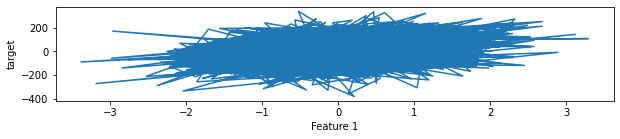

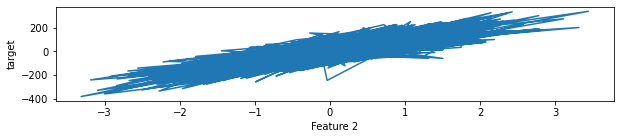

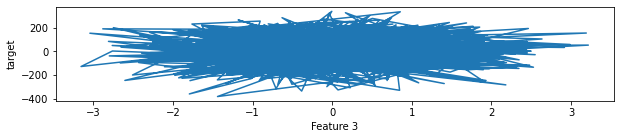

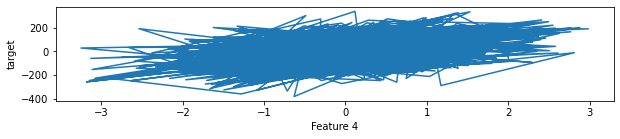

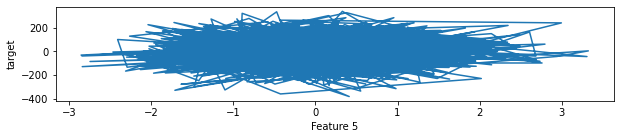

In [7]:

for i in range(train.shape[1]-1):
    plt.figure(figsize=(10,10))
    plt.subplot(5,1,i+1)
    plt.plot(train.iloc[:,i].values,train.iloc[:,-1].values)
    plt.xlabel('Feature {}'.format(i+1))
    plt.ylabel('target')
    plt.show()

#NORMALISING THE DATA

In [8]:
u=train.iloc[:,:-1].mean(axis=0)
std=train.iloc[:,:-1].std(axis=0)
train.iloc[:,:-1]=(train.iloc[:,:-1]-u)/std


In [9]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.290074,-0.898431,-0.372265,0.441633,0.524860,-82.154667
1,-0.842441,-0.158180,-0.723430,-0.994331,0.598773,-48.897960
2,0.232931,0.157021,-0.102063,0.729718,-0.203718,77.270371
3,0.171655,0.167158,-0.530410,-0.078352,-1.332620,-2.988581
4,-1.701656,0.558161,-2.722236,-0.633427,1.258945,-37.596722


In [10]:
x=train.iloc[:,:-1].values
y=train.iloc[:,-1].values
y=y.reshape((-1,1))


In [11]:
x.shape,y.shape

((1600, 5), (1600, 1))

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [14]:
model.coef_

array([[29.60284432, 94.68026927,  8.37806324, 45.53726898,  2.46538607]])

In [15]:
model.intercept_

array([0.31883538])

TRAINING ACCURACY

In [16]:
model.score(x,y)*100

96.60939669975616

In [17]:
test=(test-u)/std
x_test=test.values
x_test.shape

(400, 5)

In [18]:
predictions=model.predict(x_test)

In [19]:
predictions.shape

(400, 1)

In [20]:
ind=np.arange(400)
ind=ind.reshape((-1,1))
ind=ind.astype('int')
pred=np.hstack((ind,predictions))


In [21]:
prediction=pd.DataFrame(pred,columns=['Id','target'])

In [22]:
prediction.head()

,Id,target
0,0.0,114.583689
1,1.0,118.012815
2,2.0,-21.739852
3,3.0,-43.936899
4,4.0,-95.914898


In [23]:
prediction.to_csv('prediction.csv',index=False)